In [1]:
import pandas as pd # data preprocessing
import itertools    # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline  
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [2]:
df = pd.concat(map(pd.read_csv, ['drugsComTrain_raw.csv', 'drugsComTest_raw.csv']), ignore_index=True)

In [3]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
df.condition.value_counts()

Birth Control                                                          38436
Depression                                                             12164
Pain                                                                    8245
Anxiety                                                                 7812
Acne                                                                    7435
Bipolar Disorde                                                         5604
Insomnia                                                                4904
Weight Loss                                                             4857
Obesity                                                                 4757
ADHD                                                                    4509
Diabetes, Type 2                                                        3362
Emergency Contraception                                                 3290
High Blood Pressure                                                     3104

In [5]:
df_train =df[(df['condition']=='Birth Control')|(df['condition']=='Depression')|(df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [6]:
df.shape

(215063, 7)

In [7]:
df_train.shape

(57066, 7)

In [8]:
X = df_train.drop(['uniqueID','drugName','rating','date','usefulCount'],axis=1)

In [9]:
X.condition.value_counts()

Birth Control          38436
Depression             12164
Diabetes, Type 2        3362
High Blood Pressure     3104
Name: condition, dtype: int64

In [10]:
X.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
14,Birth Control,"""Started Nexplanon 2 months ago because I have..."


In [11]:
#Segment dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2 ')]

Text(0.5, 1.0, 'Word cloud for Birth control')

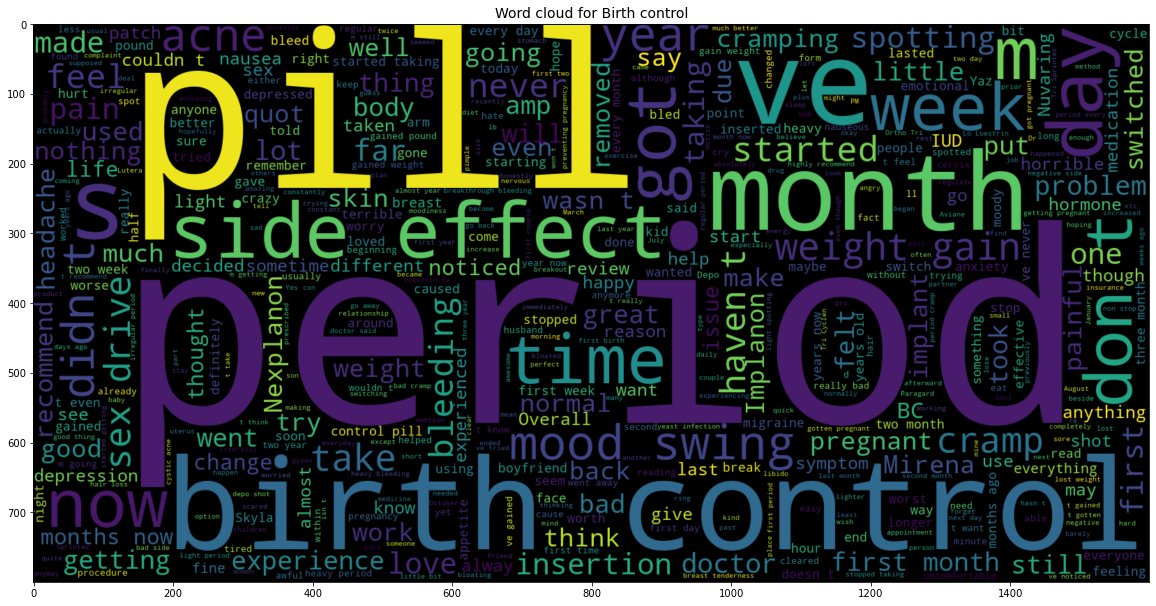

In [12]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

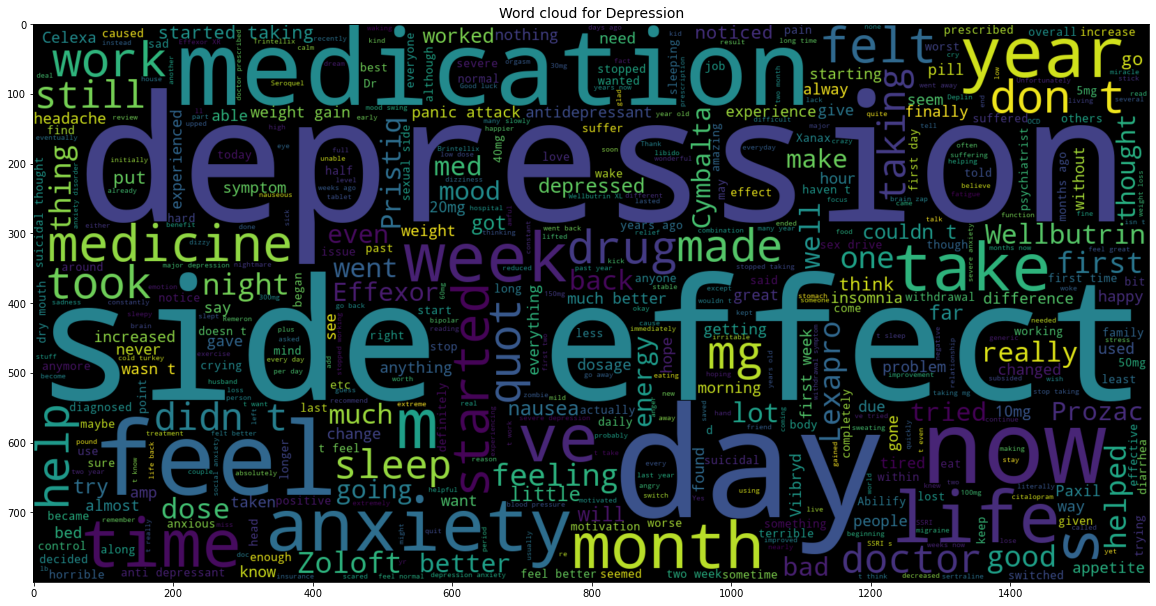

In [13]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

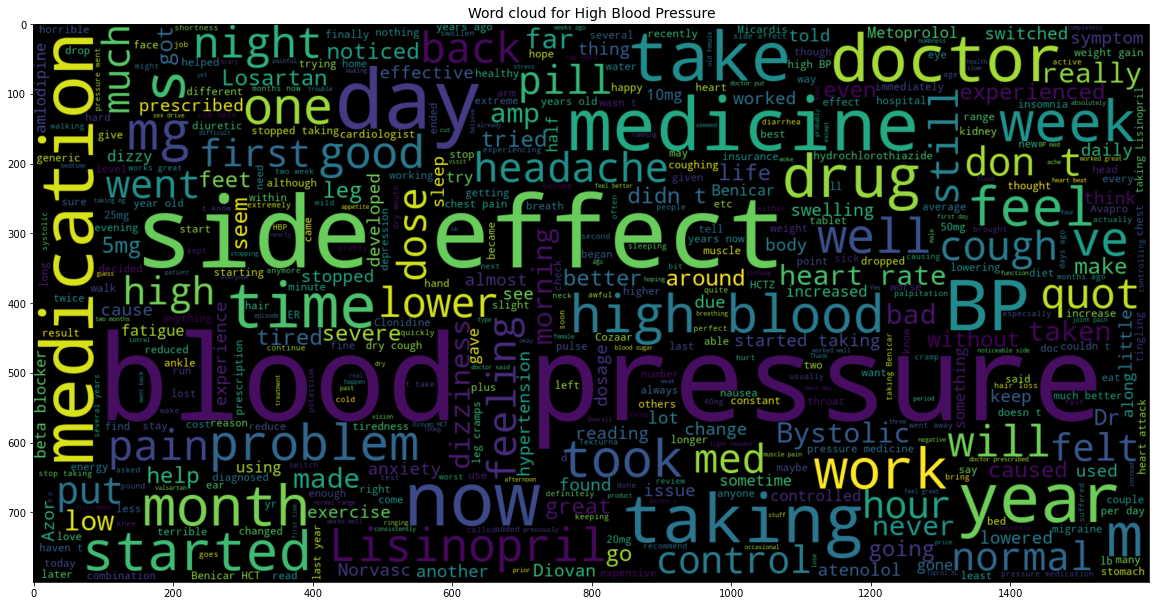

In [14]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

Data Preprocessing

In [15]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [16]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

Remove Double Quotes 

In [17]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [18]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

<ipython-input-18-a7edaab304c3>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [19]:
X.head()

,condition,review
2,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."
3,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"
9,Birth Control,"I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
14,Birth Control,"Started Nexplanon 2 months ago because I have a minimal amount of contraception&#039;s I can take due to my inability to take the hormone that is used in most birth controls. I&#039;m trying to give it time because it is one of my only options right now. But honestly if I had options I&#039;d get it removed.\r\nI&#039;ve never had acne problems in my life, and immediately broke out after getting it implanted. Sex drive is completely gone, and I used to have sex with my boyfriend a few days a week, now its completely forced and not even fun for me anymore. I mean I&#039;m on birth control because I like having sex but don&#039;t want to get pregnant, why take a birth control that takes away sex? Very unhappy and hope that I get it back with time or I&#039;m getting it removed."


stopwords like "the" ,"is","in","for","where","When","to","at" etc 

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mukit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Lemmitization

In [22]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [23]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [24]:
import nltk
nltk.download('wordnet')
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mukit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


sportingly
very
troubled


In [25]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [26]:
from bs4 import BeautifulSoup
import re
X['review_clean'] = X['review'].apply(review_to_words)

In [27]:
X.head()

,condition,review,review_clean
2,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.",used take another oral contraceptive pill cycle happy light period max day side effect contained hormone gestodene available u switched lybrel ingredient similar pill ended started lybrel immediately first day period instruction said period lasted two week taking second pack two week third pack thing got even worse third period lasted two week end third week still daily brown discharge positive side side effect idea period free tempting ala
3,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch",first time using form birth control glad went patch month first decreased libido subsided downside made period longer day exact used period day max also made cramp intense first two day period never cramp using birth control happy patch
9,Birth Control,"I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.",pill many year doctor changed rx chateal effective really help completely clearing acne take month though gain extra weight develop emotional health issue stopped taking bc started using natural method birth control started take bc hate acne came back age really hope symptom like depression weight gain begin affect older also naturally moody may worsen thing negative mental rut today also hope push edge believe depressed hopefully like younger
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
14,Birth Control,"Started Nexplanon 2 months ago because I have a minim

### Creating Features and Target Variable 

In [28]:
X_feat=X['review_clean']
y=X['condition']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Bag of Words

In [31]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [32]:
count_train

<45652x17294 sparse matrix of type '<class 'numpy.int64'>'
	with 1460721 stored elements in Compressed Sparse Row format>

# Machine Learning Madel : Logstic Regression

C:\Users\mukit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:   0.985
Confusion matrix, without normalization


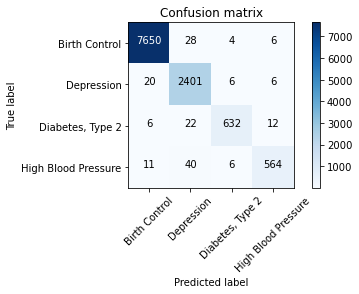

In [33]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(count_train, y_train)
pred = LR.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

      Birth Control       1.00      1.00      1.00      7688
         Depression       0.96      0.99      0.98      2433
   Diabetes, Type 2       0.98      0.94      0.96       672
High Blood Pressure       0.96      0.91      0.93       621

           accuracy                           0.99     11414
          macro avg       0.97      0.96      0.97     11414
       weighted avg       0.99      0.99      0.99     11414



# Machine Learning Madel : Random Forest

accuracy:   0.986
Confusion matrix, without normalization


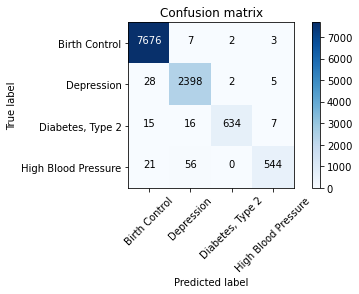

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(count_train, y_train)
pred = RF.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

      Birth Control       0.99      1.00      1.00      7688
         Depression       0.97      0.99      0.98      2433
   Diabetes, Type 2       0.99      0.94      0.97       672
High Blood Pressure       0.97      0.88      0.92       621

           accuracy                           0.99     11414
          macro avg       0.98      0.95      0.97     11414
       weighted avg       0.99      0.99      0.99     11414



## Machine Learning Madel : Naive Bayes 

accuracy:   0.969
Confusion matrix, without normalization


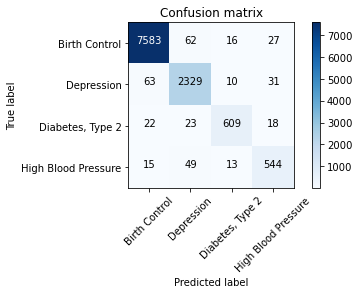

In [37]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

      Birth Control       0.99      0.99      0.99      7688
         Depression       0.95      0.96      0.95      2433
   Diabetes, Type 2       0.94      0.91      0.92       672
High Blood Pressure       0.88      0.88      0.88       621

           accuracy                           0.97     11414
          macro avg       0.94      0.93      0.93     11414
       weighted avg       0.97      0.97      0.97     11414



### Machine Leaning Midel:Passive Aggressive Classifier 

accuracy:   0.985
Confusion matrix, without normalization


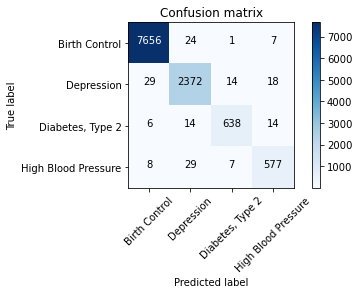

In [39]:
from sklearn.linear_model import PassiveAggressiveClassifier

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

      Birth Control       0.99      1.00      1.00      7688
         Depression       0.97      0.97      0.97      2433
   Diabetes, Type 2       0.97      0.95      0.96       672
High Blood Pressure       0.94      0.93      0.93       621

           accuracy                           0.99     11414
          macro avg       0.97      0.96      0.96     11414
       weighted avg       0.98      0.99      0.98     11414



# Predictions 

In [51]:
X.tail()

,condition,review,review_clean
215029,Depression,"I&#039;m a 19 year old girl and I&#039;ve been suffering from major depression and social anxiety for the past 5 years. I finally went to the doctors and was prescribed Lexapro 10mg. I&#039;ve been on it for 4 days now. I had side effects the first day I took it - nausea, slight headache, slight dizziness, sleepy and yawning a lot and most annoyingly INSOMNIA! I even felt a little confused at bedtime while trying to sleep. The side effects lasted for the first 3 days, now they&#039;re slowly going away. The first day I was really hyper and the next I was so tired but now it&#039;s starting to balance out and I can sleep better. I haven&#039;t had a depressing day since I&#039;ve been taking Lexapro so lets hope it stays that way.",year old girl suffering major depression social anxiety past year finally went doctor prescribed lexapro mg day side effect first day took nausea slight headache slight dizziness sleepy yawning lot annoyingly insomnia even felt little confused bedtime trying sleep side effect lasted first day slowly going away first day really hyper next tired starting balance sleep better depressing day since taking lexapro let hope stay way
215038,Birth Control,"I first would like to thank all of you that posted comments. After reading them, I felt I&#039;m not alone. It&#039;s not just happening to me, there is nothing wrong with me. I&#039;m 34, with one child and had Mirena for 5 months. The insertion was almost painless and the first month was fine. Right now, I have gained 10lbs, loss of sex drive, have headaches, back pain, insomnia, constipation, hair loss and general depression - OF COURSE that&#039;s going to cause to have mood swings. I&#039;m waiting on an appointment to have it removed. ANOTHER IMPORTANT ASPECT is that I had suffered from postpartum depression after the birth of my child 4 years ago and honestly I was worried that these side effects (especially depression) were a sign that I was still not okay.",first would like thank posted comment reading felt alone happening nothing wrong one child mirena month insertion almost painless first month fine right gained lb loss sex drive headache back pain insomnia constipation hair loss general depression course going cause mood swing waiting appointment removed another important aspect suffered postpartum depression birth child year ago honestly worried side effect especially depression sign still okay
215056,Birth Control,"I was on Microgestin for about 3 years. Over the past year, I started to get extremely bad headaches during the sugar pill week. I took extra strength Tylenol the entire week, twice a day, and it still didn&#039;t make my headaches go away. I also would feel very lightheaded and nauseous. I had to leave work early, it was bad. The only good thing was I&#039;ve had the same box of tampons for the entire year. I barely had a period. Oh yeah, I also got high pigmentation right above my lips. They call it a &quot;pregnancy mask&quot; but you can get it with certain birth control. It is very dark and it is difficult to hide with makeup! I&#039;m not a big fan of having a weird skin mustache so I went off it.",microgestin year past year started get extremely bad headache sugar pill week took extra strength tylenol entire week twice day still make headache go away also would feel lightheaded nauseous leave work early bad good thing box tampon entire year barely period oh yeah also got high pigmentation right lip call pregnancy mask get certain birth control dark difficult hide makeup big fan weird skin mustache went
215057,Birth Control,"I started taking Apri about 7 months ago. My breats got noticeably larger within the first few weeks and I gained about 10 pounds, but I&#039;m a thin girl anyway so I gladly take on the extra few pounds and curves. I got prescribed this birth control because of my ovarian cysts and since I have not had any problems with them. They&#039;ve been unnoticeable

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)


In [53]:
text =["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test = tfidf_vectorizer.transform(text)
pred1=RF.predict(test)[0]
pred1

'Depression'

In [54]:
text =["This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]
test = tfidf_vectorizer.transform(text)
pred1=passive.predict(test)[0]
pred1

'Depression'

In [55]:
text =["I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"]
test = tfidf_vectorizer.transform(text)
pred1=LR.predict(test)[0]
pred1

'Diabetes, Type 2'

K-Folding on best Model Random Forest

In [56]:
count_vectorizer = CountVectorizer(stop_words='english')

tt = count_vectorizer.fit_transform(X_feat)


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(tt, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 45652, Test set:11414
Fold:2, Train set: 45653, Test set:11413
Fold:3, Train set: 45653, Test set:11413
Fold:4, Train set: 45653, Test set:11413
Fold:5, Train set: 45653, Test set:11413


In [58]:
score = cross_val_score(RandomForestClassifier(), tt, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.98528123 0.98422851 0.98168755 0.98212565 0.98519232]
Average score: 0.98


K-Folding on best Model Logistic Regression

In [59]:
score = cross_val_score(LogisticRegression(), tt, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

C:\Users\mukit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mukit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Scores for each fold are: [0.98624496 0.9855428  0.98457899 0.98440375 0.98694471]
Average score: 0.99


C:\Users\mukit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
